In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import warnings
warnings.simplefilter(action='ignore')

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Load Datasets</h1>

In [3]:
# train dataset
df = pd.read_csv("FMCG_data.csv")

# test dataset
df_test = pd.read_csv("FMCG_data.csv")

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Exploration</h1>

In [4]:
# display first 5 rows from train data

df.head().T

,0,1,2,3,4
Date,2023-01-01,2023-01-01,2023-01-01,2023-01-01,2023-01-01
Ware_house_ID,WH_100000,WH_100001,WH_100002,WH_100003,WH_100004
WH_Manager_ID,EID_50000,EID_50001,EID_50002,EID_50003,EID_50004
Location_type,Urban,Rural,Rural,Rural,Rural
WH_capacity_size,Small,Large,Mid,Mid,Large
zone,West,North,South,North,North
WH_regional_zone,Zone 6,Zone 5,Zone 2,Zone 3,Zone 5
Refill_Requests,3,0,1,7,3
transport_issue,1,0,0,4,1
No_of_Competitor,2,4,4,2,2


In [5]:
# shape and size of train data

print("Shape : ", df.shape)
print("Size : ", df.size)

Shape :  (350001, 25)
Size :  8750025


In [6]:
# shape and size of test data

print("Shape : ", df_test.shape)
print("Size : ", df_test.size)

Shape :  (350001, 25)
Size :  8750025


In [7]:
#display all columns

print(df.columns)
print(' ')
print("Total columns in train dataset = ", len(df.columns))
print("Total columns in test dataset = ", len(df_test.columns))

Index(['Date', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'Refill_Requests',
       'transport_issue', 'No_of_Competitor', 'No_of_retailers',
       'Warehouse_Ownership', 'Number_of_distributors', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown', 'govt_check',
       'product_wg_ton'],
      dtype='object')
 
Total columns in train dataset =  25
Total columns in test dataset =  25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350001 entries, 0 to 350000
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          350001 non-null  object 
 1   Ware_house_ID                 350001 non-null  object 
 2   WH_Manager_ID                 350001 non-null  object 
 3   Location_type                 350001 non-null  object 
 4   WH_capacity_size              350001 non-null  object 
 5   zone                          350001 non-null  object 
 6   WH_regional_zone              350001 non-null  object 
 7   Refill_Requests               350001 non-null  int64  
 8   transport_issue               350001 non-null  int64  
 9   No_of_Competitor              350001 non-null  int64  
 10  No_of_retailers               350001 non-null  int64  
 11  Warehouse_Ownership           350001 non-null  object 
 12  Number_of_distributors        350001 non-nul

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350001 entries, 0 to 350000
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          350001 non-null  object 
 1   Ware_house_ID                 350001 non-null  object 
 2   WH_Manager_ID                 350001 non-null  object 
 3   Location_type                 350001 non-null  object 
 4   WH_capacity_size              350001 non-null  object 
 5   zone                          350001 non-null  object 
 6   WH_regional_zone              350001 non-null  object 
 7   Refill_Requests               350001 non-null  int64  
 8   transport_issue               350001 non-null  int64  
 9   No_of_Competitor              350001 non-null  int64  
 10  No_of_retailers               350001 non-null  int64  
 11  Warehouse_Ownership           350001 non-null  object 
 12  Number_of_distributors        350001 non-nul

In [10]:
df.dtypes.value_counts()

int64      10
object      9
float64     6
Name: count, dtype: int64

In [11]:
# display two sample rows of columns with int dtype

df.select_dtypes(include='int64').sample(2).T

,112309,331897
Refill_Requests,4,6
transport_issue,3,6
No_of_Competitor,4,3
No_of_retailers,4923,6350
Number_of_distributors,27,77
flood_impacted,0,0
flood_proof,0,0
electric_supply,1,1
dist_from_hub,168,257
storage_issue_reported,30,11


In [12]:
# display two sample rows of columns with object dtype

df.select_dtypes(include='object').sample(2).T

,257114,198040
Date,2023-11-01,2023-08-01
Ware_house_ID,WH_107114,WH_123040
WH_Manager_ID,EID_57114,EID_73040
Location_type,Rural,Rural
WH_capacity_size,Large,Large
zone,North,North
WH_regional_zone,Zone 5,Zone 5
Warehouse_Ownership,Company Owned,Company Owned
approved_wh_govt_certificate,A,NaN


In [13]:
# display two sample rows of columns with float dtype

df.select_dtypes(include='float64').sample(2).T

,196692,280316
workers_num,75.0,51.0
wh_est_year,2014.0,2017.0
temp_reg_mach,1.0,0.0
wh_breakdown,14.0,12.0
govt_check,26.0,24.0
product_wg_ton,40045.0,58987.0


In [14]:
for i in df:
    print(i)
    print(df[i].unique())
    print("Length of unique values in column ", i, ' :', len(df[i].unique()))
    print(' ')

Date
['2023-01-01' '2023-02-01' '2023-03-01' '2023-04-01' '2023-05-01'
 '2023-06-01' '2023-07-01' '2023-08-01' '2023-09-01' '2023-10-01'
 '2023-11-01' '2023-12-01' '2024-01-01' '2024-02-01']
Length of unique values in column  Date  : 14
 
Ware_house_ID
['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_124997' 'WH_124998'
 'WH_124999']
Length of unique values in column  Ware_house_ID  : 25000
 
WH_Manager_ID
['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_74997' 'EID_74998'
 'EID_74999']
Length of unique values in column  WH_Manager_ID  : 25000
 
Location_type
['Urban' 'Rural']
Length of unique values in column  Location_type  : 2
 
WH_capacity_size
['Small' 'Large' 'Mid']
Length of unique values in column  WH_capacity_size  : 3
 
zone
['West' 'North' 'South' 'East']
Length of unique values in column  zone  : 4
 
WH_regional_zone
['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Length of unique values in column  WH_regional_zone  : 6
 
Refill_Requests
[ 3  0  1  7  8  4  6  5  2  9 10 1

In [15]:
df.describe().round(2)

,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Number_of_distributors,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,wh_breakdown,govt_check,product_wg_ton
count,350001.00,350001.00,350001.00,350001.00,350001.00,350001.0,350001.00,350001.00,350001.00,349011.00,183666.00,350001.00,350000.00,350000.00,350000.00,350000.00
mean,4.72,2.43,3.73,4985.88,61.92,0.1,0.05,0.66,163.54,37.67,2009.38,24.33,0.30,13.27,28.57,35141.77
std,3.65,2.58,3.00,1285.71,21.65,0.3,0.23,0.47,62.72,11.99,7.53,11.30,0.46,7.64,11.45,14871.88
min,0.00,0.00,0.00,0.00,8.00,0.0,0.00,0.00,55.00,0.00,1996.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,2.00,4141.00,46.00,0.0,0.00,0.00,109.00,30.00,2003.00,16.00,0.00,7.00,20.00,24378.75
50%,4.00,2.00,3.00,4893.00,62.00,0.0,0.00,1.00,164.00,37.00,2009.00,24.00,0.00,12.00,29.00,34435.00
75%,7.00,4.00,5.00,5724.00,77.00,0.0,0.00,1.00,218.00,45.00,2016.00,32.00,1.00,19.00,37.00,45229.00
max,26.00,22.00,22.00,12861.00,146.00,1.0,1.00,1.00,271.00,124.00,2023.00,75.00,1.00,46.00,72.00,93093.00


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Cleaning</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Train Data</h1>

In [16]:
# display number of unique values in each column

df.nunique().sort_values(ascending=False)

product_wg_ton                  65179
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  9068
dist_from_hub                     217
Number_of_distributors            138
workers_num                       122
storage_issue_reported             73
govt_check                         70
wh_breakdown                       47
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
Date                               14
approved_wh_govt_certificate        6
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
flood_proof                         2
flood_impacted                      2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [17]:
df.drop(columns=['Ware_house_ID', 'WH_Manager_ID','Date'], inplace = True)

In [18]:
print(len(df[df.duplicated]))

0


In [19]:
# Missing values
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

In [ ]:
# print percentage of null values in each column

null_values_features = [i for i in df.columns if df[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df[i].isnull().mean()*100, 2), "% missing values")

In [ ]:
# wh_est_year 

df.drop(columns=['wh_est_year'], inplace = True)

In [20]:
plt.figure(figsize=(6, 4))
sns.distplot(df['workers_num'], hist=False, kde=True, color='purple')
plt.show()

NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

In [21]:
df['workers_num'].median()

37.0

In [22]:
df['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [23]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [24]:
df.isnull().sum()

Location_type                        0
WH_capacity_size                     0
zone                                 0
WH_regional_zone                     0
Refill_Requests                      0
transport_issue                      0
No_of_Competitor                     0
No_of_retailers                      0
Warehouse_Ownership                  0
Number_of_distributors               0
flood_impacted                       0
flood_proof                          0
electric_supply                      0
dist_from_hub                        0
workers_num                        990
wh_est_year                     166335
storage_issue_reported               0
temp_reg_mach                        1
approved_wh_govt_certificate         0
wh_breakdown                         1
govt_check                           1
product_wg_ton                       1
dtype: int64

In [25]:
# outliers

In [26]:
df.nunique().sort_values(ascending= True)

Location_type                       2
temp_reg_mach                       2
electric_supply                     2
flood_proof                         2
Warehouse_Ownership                 2
flood_impacted                      2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
approved_wh_govt_certificate        6
No_of_Competitor                   23
transport_issue                    23
Refill_Requests                    27
wh_est_year                        28
wh_breakdown                       47
govt_check                         70
storage_issue_reported             73
workers_num                       122
Number_of_distributors            138
dist_from_hub                     217
No_of_retailers                  9068
product_wg_ton                  65179
dtype: int64

In [27]:
for i in df.columns[df.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df[i].unique()))
    print(df[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    321398
Urban     28603
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    142366
Mid      140280
Small     67355
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    143892
West     111035
South     89068
East       6006
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    190092
Rented           159909
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    315645
1     34356
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    330876
1     19125
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    229909
0    120092
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 3
temp_reg

In [28]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0.0,A,5.0,15.0,17115.0
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0.0,A,3.0,17.0,5074.0
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0.0,A,6.0,22.0,23137.0
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1.0,A+,3.0,27.0,22115.0
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0.0,C,6.0,24.0,24071.0


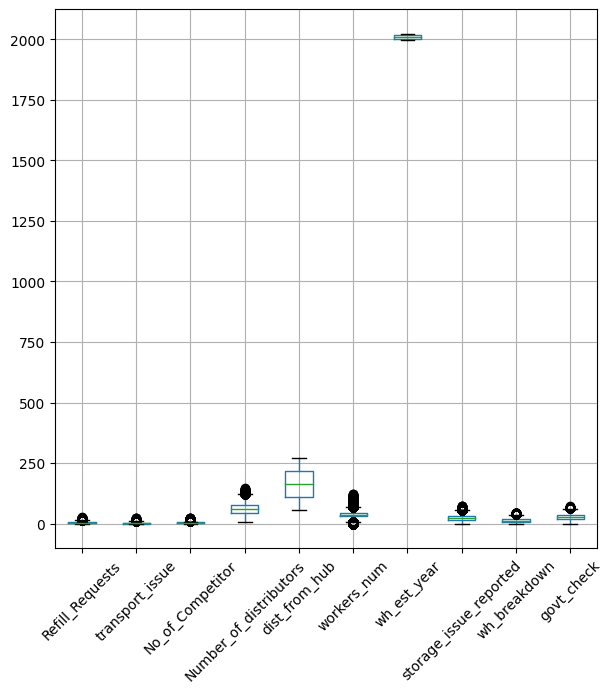

In [29]:
num_columns = df.select_dtypes(include=['int', 'float'])
num_columns.drop(columns=['product_wg_ton', 'No_of_retailers'], inplace=True)
num_columns.drop(columns=num_columns.columns[num_columns.nunique()<=4], inplace=True)
plt.figure(figsize=(7,7))
num_columns.boxplot()
plt.xticks(rotation=45)
plt.show()

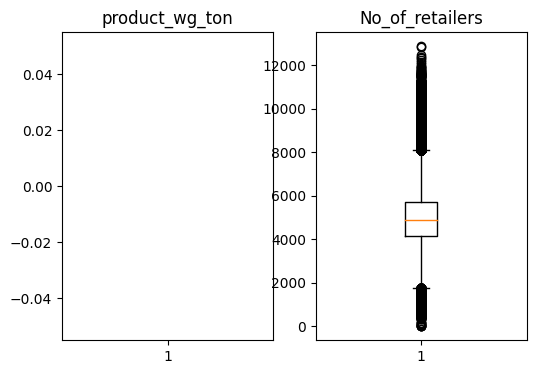

In [30]:
plt.figure(figsize=(6, 4))

ax1 = plt.subplot2grid((1, 2), (0, 0))

plt.boxplot(df.product_wg_ton)
plt.title('product_wg_ton')

ax2 = plt.subplot2grid((1, 2), (0, 1))

plt.boxplot(df.No_of_retailers)
plt.title('No_of_retailers')

plt.show()

In [31]:
def count_outliers(df):
    outliers={}
    for i in df.columns:
        if pd.api.types.is_numeric_dtype(df[i]):
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df[(df[i] < lower) | (df[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [32]:
outlier_counts = count_outliers(df)
outlier_counts

{'Refill_Requests': 4159,
 'transport_issue': 3852,
 'No_of_Competitor': 16980,
 'No_of_retailers': 7980,
 'Number_of_distributors': 494,
 'flood_impacted': 34356,
 'flood_proof': 19125,
 'electric_supply': 0,
 'dist_from_hub': 0,
 'workers_num': 8332,
 'wh_est_year': 0,
 'storage_issue_reported': 932,
 'temp_reg_mach': 0,
 'wh_breakdown': 436,
 'govt_check': 114,
 'product_wg_ton': 1327}

In [33]:
df['product_wg_ton'].corr(df['flood_proof'])

-0.0013781060322405482

In [34]:
df['product_wg_ton'].corr(df['flood_impacted'])

-0.0022768441325800573

In [35]:
df.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [36]:
def remove_outliers(df):
    num_df = df.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df.loc[df_no_outliers.index]

In [37]:
df = remove_outliers(df)
df.shape

(161071, 20)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Test Data</h1>

In [38]:
# display number of unique values in each column

df_test.nunique().sort_values(ascending=False)

product_wg_ton                  65179
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  9068
dist_from_hub                     217
Number_of_distributors            138
workers_num                       122
storage_issue_reported             73
govt_check                         70
wh_breakdown                       47
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
Date                               14
approved_wh_govt_certificate        6
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
flood_proof                         2
flood_impacted                      2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [39]:
df_test.drop(columns=['Ware_house_ID', 'WH_Manager_ID'], inplace = True)

In [40]:
print(len(df_test[df_test.duplicated]))

0


In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_test.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

In [42]:
# print percentage of null values in each column

null_values_features = [i for i in df_test.columns if df_test[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df_test[i].isnull().mean()*100, 2), "% missing values")

workers_num 0.28 % missing values
wh_est_year 47.52 % missing values
approved_wh_govt_certificate 3.63 % missing values


In [43]:
# wh_est_year 

df_test.drop(columns=['wh_est_year'], inplace = True)

In [44]:
plt.figure(figsize=(6, 4))
sns.distplot(df_test['workers_num'], hist=False, kde=True, color='purple')
plt.show()

NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

In [45]:
df_test['workers_num'].median()

37.0

In [46]:
df_test['workers_num'].fillna(df_test['workers_num'].median(), inplace=True)

In [47]:
df_test['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [48]:
df_test['approved_wh_govt_certificate'].fillna(df_test['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [49]:
df_test.isnull().sum()

Date                            0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
Refill_Requests                 0
transport_issue                 0
No_of_Competitor                0
No_of_retailers                 0
Warehouse_Ownership             0
Number_of_distributors          0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported          0
temp_reg_mach                   1
approved_wh_govt_certificate    0
wh_breakdown                    1
govt_check                      1
product_wg_ton                  1
dtype: int64

In [50]:
# Outliers

In [51]:
df_test.nunique().sort_values(ascending= True)

temp_reg_mach                       2
Location_type                       2
electric_supply                     2
flood_proof                         2
flood_impacted                      2
Warehouse_Ownership                 2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
approved_wh_govt_certificate        6
Date                               14
No_of_Competitor                   23
transport_issue                    23
Refill_Requests                    27
wh_breakdown                       47
govt_check                         70
storage_issue_reported             73
workers_num                       122
Number_of_distributors            138
dist_from_hub                     217
No_of_retailers                  9068
product_wg_ton                  65179
dtype: int64

In [52]:
for i in df_test.columns[df_test.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df_test[i].unique()))
    print(df_test[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    321398
Urban     28603
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    142366
Mid      140280
Small     67355
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    143892
West     111035
South     89068
East       6006
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    190092
Rented           159909
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    315645
1     34356
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    330876
1     19125
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    229909
0    120092
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 3
temp_reg

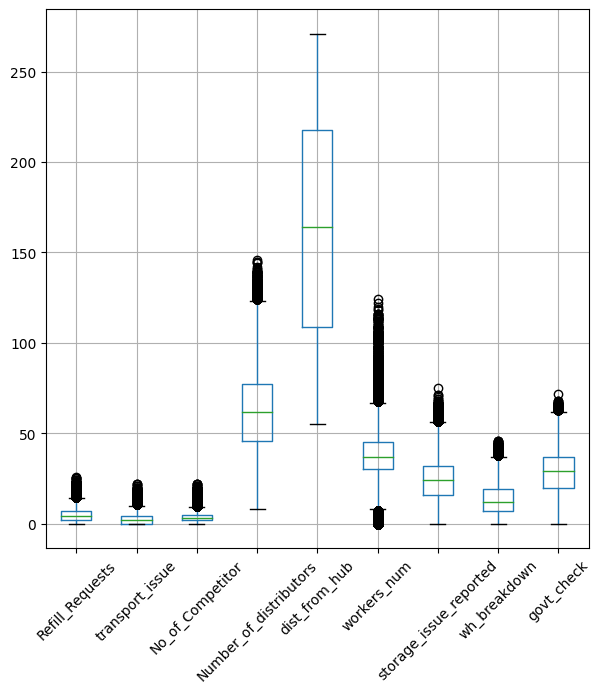

In [53]:
num_columns = df_test.select_dtypes(include=['int', 'float'])
num_columns.drop(columns=['product_wg_ton', 'No_of_retailers'], inplace=True)
num_columns.drop(columns=num_columns.columns[num_columns.nunique()<=4], inplace=True)
plt.figure(figsize=(7,7))
num_columns.boxplot()
plt.xticks(rotation=45)
plt.show()

In [54]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,112,25.0,2009.0,18,0.0,C,6.0,24.0,24071.0
5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,1,152,35.0,2009.0,23,1.0,A+,3.0,3.0,32134.0
6,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,1,77,27.0,2010.0,24,0.0,B,3.0,6.0,30142.0
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,1,124,22.0,2013.0,13,1.0,A+,5.0,2.0,18082.0
10,Rural,Large,North,Zone 6,7,1,3,4623,Company Owned,31,1,150,37.0,1999.0,17,0.0,B+,4.0,6.0,21125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349994,Rural,Mid,North,Zone 4,2,3,5,5160,Rented,85,0,71,46.0,2000.0,26,0.0,A,26.0,35.0,45654.0
349995,Rural,Small,North,Zone 1,11,0,7,6256,Rented,68,1,142,62.0,2016.0,8,0.0,B+,28.0,38.0,52057.0
349996,Rural,Mid,West,Zone 2,4,7,1,5332,Company Owned,85,1,130,39.0,2005.0,23,0.0,B,21.0,36.0,37853.0
349997,Urban,Large,South,Zone 5,12,4,0,4044,Rented,65,1,147,27.0,2012.0,12,1.0,A,30.0,55.0,65888.0


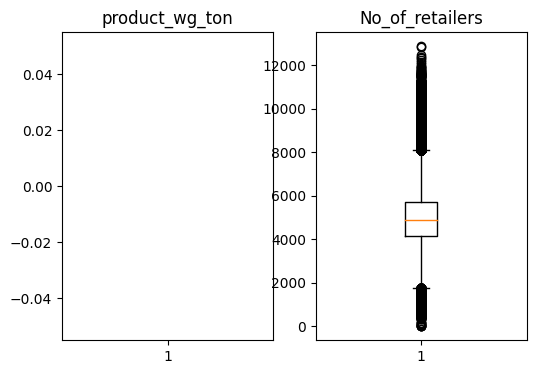

In [55]:
plt.figure(figsize=(6, 4))

ax1 = plt.subplot2grid((1, 2), (0, 0))

plt.boxplot(df_test.product_wg_ton)
plt.title('product_wg_ton')

ax2 = plt.subplot2grid((1, 2), (0, 1))

plt.boxplot(df_test.No_of_retailers)
plt.title('No_of_retailers')

plt.show()

In [56]:
def count_outliers(df_test):
    outliers={}
    for i in df_test.columns:
        if pd.api.types.is_numeric_dtype(df_test[i]):
            q1 = df_test[i].quantile(0.25)
            q3 = df_test[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df_test[(df_test[i] < lower) | (df_test[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [57]:
outlier_counts = count_outliers(df_test)
outlier_counts

{'Refill_Requests': 4159,
 'transport_issue': 3852,
 'No_of_Competitor': 16980,
 'No_of_retailers': 7980,
 'Number_of_distributors': 494,
 'flood_impacted': 34356,
 'flood_proof': 19125,
 'electric_supply': 0,
 'dist_from_hub': 0,
 'workers_num': 8332,
 'storage_issue_reported': 932,
 'temp_reg_mach': 0,
 'wh_breakdown': 436,
 'govt_check': 114,
 'product_wg_ton': 1327}

In [58]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,112,25.0,2009.0,18,0.0,C,6.0,24.0,24071.0
5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,1,152,35.0,2009.0,23,1.0,A+,3.0,3.0,32134.0
6,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,1,77,27.0,2010.0,24,0.0,B,3.0,6.0,30142.0
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,1,124,22.0,2013.0,13,1.0,A+,5.0,2.0,18082.0
10,Rural,Large,North,Zone 6,7,1,3,4623,Company Owned,31,1,150,37.0,1999.0,17,0.0,B+,4.0,6.0,21125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349994,Rural,Mid,North,Zone 4,2,3,5,5160,Rented,85,0,71,46.0,2000.0,26,0.0,A,26.0,35.0,45654.0
349995,Rural,Small,North,Zone 1,11,0,7,6256,Rented,68,1,142,62.0,2016.0,8,0.0,B+,28.0,38.0,52057.0
349996,Rural,Mid,West,Zone 2,4,7,1,5332,Company Owned,85,1,130,39.0,2005.0,23,0.0,B,21.0,36.0,37853.0
349997,Urban,Large,South,Zone 5,12,4,0,4044,Rented,65,1,147,27.0,2012.0,12,1.0,A,30.0,55.0,65888.0


In [59]:
df_test['product_wg_ton'].corr(df_test['storage_issue_reported'])

0.6887753290004746

In [60]:
df_test.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [61]:
def remove_outliers(df_test):
    num_df = df_test.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df_test.loc[df_no_outliers.index]

In [62]:
df_test = remove_outliers(df_test)

In [63]:
df_test.shape

(308322, 20)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Summary</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Analysis and Visualization</h1>

  Location_type  product_wg_ton
0         Rural    5.194449e+09
1         Urban    4.989290e+08
  


Text(0.5, 1.0, 'Distribution of Warehouse location type')

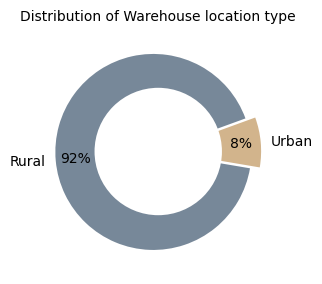

In [64]:
plt.figure(figsize=(12, 7))


# Warehouse location type
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

print(df.groupby('Location_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['Location_type'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05),
                                     startangle=20, ylabel=' ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Warehouse location type', fontsize=10)



Text(0, 0.5, 'Avg product weight')

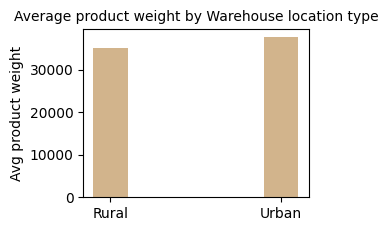

In [65]:
#plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))

x = df.groupby('Location_type')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='tan', width=0.2)
plt.title('Average product weight by Warehouse location type', fontsize=10)
plt.ylabel('Avg product weight')



In [66]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,112,25.0,2009.0,18,0.0,C,6.0,24.0,24071.0
5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,1,152,35.0,2009.0,23,1.0,A+,3.0,3.0,32134.0
6,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,1,77,27.0,2010.0,24,0.0,B,3.0,6.0,30142.0
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,1,124,22.0,2013.0,13,1.0,A+,5.0,2.0,18082.0
10,Rural,Large,North,Zone 6,7,1,3,4623,Company Owned,31,1,150,37.0,1999.0,17,0.0,B+,4.0,6.0,21125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349994,Rural,Mid,North,Zone 4,2,3,5,5160,Rented,85,0,71,46.0,2000.0,26,0.0,A,26.0,35.0,45654.0
349995,Rural,Small,North,Zone 1,11,0,7,6256,Rented,68,1,142,62.0,2016.0,8,0.0,B+,28.0,38.0,52057.0
349996,Rural,Mid,West,Zone 2,4,7,1,5332,Company Owned,85,1,130,39.0,2005.0,23,0.0,B,21.0,36.0,37853.0
349997,Urban,Large,South,Zone 5,12,4,0,4044,Rented,65,1,147,27.0,2012.0,12,1.0,A,30.0,55.0,65888.0


  Warehouse_Ownership  product_wg_ton
0       Company Owned    3.087304e+09
1              Rented    2.606074e+09
  


Text(0.5, 1.0, 'Distribution of Warehouse owner type')

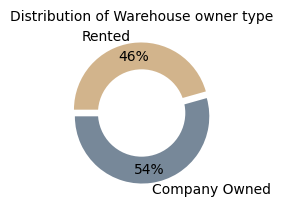

In [67]:
# Warehouse Owner Type

# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))
print(df.groupby('Warehouse_Ownership')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['Warehouse_Ownership'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05),
                                     startangle=180, ylabel=' ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Warehouse owner type', fontsize=10)



<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Warehouse location type & Owner Type</h1>

#### Location type
* Urban areas account for 8 % of the total, while rural areas make up the remaining 92 %.
* The average product weight in rural areas is higher than of urban areas.
* The total product weight in rural areas far exceeds that of urban areas.

#### Owner type
* The first graph illustrates the distribution of warehouse ownership, revealing that 46% of warehouses are rented, while 54% are owned by companies.
* The average product weight in both types of warehouses appears to be nearly identical.
* This data shows a slightly higher total product weight in company-owned warehouses despite their minority in distribution.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Electric_supply & temp_reg_mach availability</h1>

   temp_reg_mach  product_wg_ton
0            0.0    3.629640e+09
1            1.0    2.063738e+09
  


Text(0.5, 1.0, 'Distribution of temp_reg_mach availability')

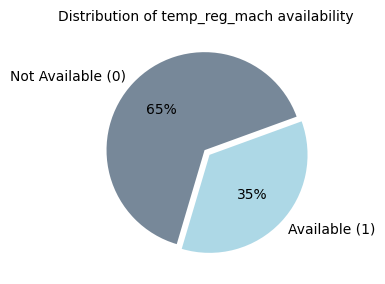

In [68]:
plt.figure(figsize=(12, 7))


# Temperature regulating machine availability
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

print(df.groupby('temp_reg_mach')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['temp_reg_mach'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'lightblue'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                     startangle=20, ylabel=' ', labels = ['Not Available (0)', 'Available (1)'])

plt.title('Distribution of temp_reg_mach availability', fontsize=10)



Text(0, 0.5, 'Avg product weight')

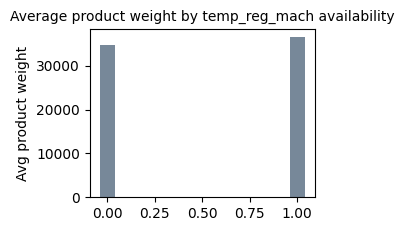

In [69]:
#plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))

x = df.groupby('temp_reg_mach')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='lightslategrey', width=0.08)
plt.title('Average product weight by temp_reg_mach availability', fontsize=10)
plt.ylabel('Avg product weight')

# Electric Supply Availability


   electric_supply  product_wg_ton
1                1    3.716388e+09
0                0    1.976991e+09
  


Text(0.5, 1.0, 'Distribution of Electric Supply Availability')

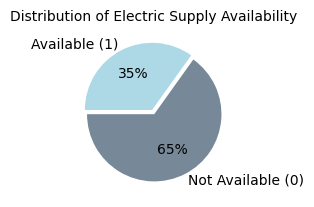

In [70]:

# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))
print(df.groupby('electric_supply')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['electric_supply'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'lightblue'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                     startangle=180, ylabel=' ', labels = ['Not Available (0)', 'Available (1)'])

plt.title('Distribution of Electric Supply Availability', fontsize=10)



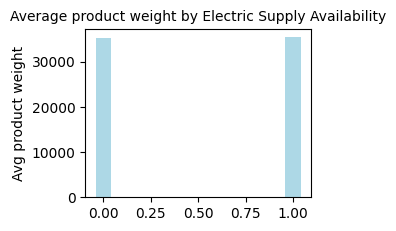

In [71]:
# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))

x = df.groupby('electric_supply')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='lightblue', width=0.08)
plt.title('Average product weight by Electric Supply Availability', fontsize=10)
plt.ylabel('Avg product weight')

plt.show()

#### Electric_supply
* 66% of the warehouses surveyed were found to be unavailable, while the remaining 34% were deemed accessible for electric supply.
* The average product weight in the electric supply not available warehouses was lower in comparison to those that were accessible for use.
* Among the available warehouses, total product weight amounted to 203,327,830 units, whereas the not available warehouses collectively held a total   product weight of 106,690,637 units.

#### Temp_reg_mach availability
* The data indicates that the availability of temperature regulating machines in warehouses is limited, with 66% of warehouses reporting unavailability, while only 34% have these machines accessible.
* Despite the lower availability, warehouses with temperature regulating machines available account for a total product weight of 101,599,625 units, compared to 208,418,842 units in warehouses where they are not available.
* The average product weight in warehouses without temperature regulating machines is lower than in those where they are available.

In [72]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,112,25.0,2009.0,18,0.0,C,6.0,24.0,24071.0
5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,1,152,35.0,2009.0,23,1.0,A+,3.0,3.0,32134.0
6,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,1,77,27.0,2010.0,24,0.0,B,3.0,6.0,30142.0
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,1,124,22.0,2013.0,13,1.0,A+,5.0,2.0,18082.0
10,Rural,Large,North,Zone 6,7,1,3,4623,Company Owned,31,1,150,37.0,1999.0,17,0.0,B+,4.0,6.0,21125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349994,Rural,Mid,North,Zone 4,2,3,5,5160,Rented,85,0,71,46.0,2000.0,26,0.0,A,26.0,35.0,45654.0
349995,Rural,Small,North,Zone 1,11,0,7,6256,Rented,68,1,142,62.0,2016.0,8,0.0,B+,28.0,38.0,52057.0
349996,Rural,Mid,West,Zone 2,4,7,1,5332,Company Owned,85,1,130,39.0,2005.0,23,0.0,B,21.0,36.0,37853.0
349997,Urban,Large,South,Zone 5,12,4,0,4044,Rented,65,1,147,27.0,2012.0,12,1.0,A,30.0,55.0,65888.0


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Storage issue reported in the last 3 months</h1>

Unique values in Storage issue reported [18 23 24 13 17 11  4 22 29 19 14 28 25  6 12 34 16  0 38 21 36 31  9 10
 20 32 27 37 15 26  5 33  7 30  8 35 39  2 40  1  3 42 43 41 44 45 46 47
 48 50 49 51 52 54 55 53 56]
  
    storage_issue_reported  product_wg_ton
24                      24     228409532.0
25                      25     225008241.0
27                      27     200847381.0
28                      28     199397761.0
26                      26     198715685.0
  


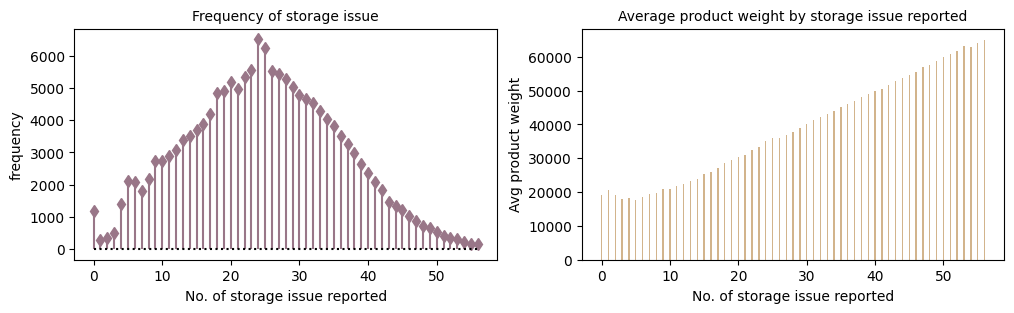

In [73]:
print("Unique values in Storage issue reported", df['storage_issue_reported'].unique())
print('  ')
print(df.groupby('storage_issue_reported')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))


# storage issue reported in the last 3 months        
# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['storage_issue_reported'].value_counts()

plt.stem(x.index, x.values, linefmt='#997688', basefmt='k:', markerfmt='d')
plt.xlabel('No. of storage issue reported')
plt.ylabel('frequency')
plt.title('Frequency of storage issue', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('storage_issue_reported')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='tan', width=0.2)
plt.title('Average product weight by storage issue reported', fontsize=10)
plt.xlabel('No. of storage issue reported')
plt.ylabel('Avg product weight')

plt.show()

#### Storage issue reported in the last 3 months
* The variables demonstrate a strong correlation, exhibiting an almost linear relationship.
*  As the product weight rises, storage issues likewise increases.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of warehouse breakdown in the last 3 months</h1>

Unique values in no. of warehouse breakdown [ 6.  3.  5.  4.  2.  1.  0.  7.  9. 10.  8. 13. 11. 12. 14. 16. 15. 17.
 18. 19. 20. 22. 21. 23. 24. 26. 25. 27. 29. 28. 31. 33. 30. 32. 34. 35.
 36. 37.]
  
    wh_breakdown  product_wg_ton
13          13.0     269572246.0
12          12.0     263554961.0
14          14.0     262009314.0
11          11.0     261741897.0
9            9.0     260711998.0
  


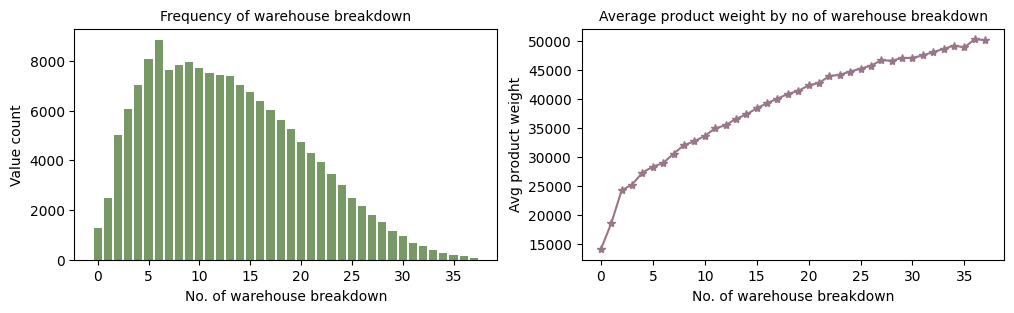

In [74]:
print("Unique values in no. of warehouse breakdown" , df['wh_breakdown'].unique())
print('  ')
print(df.groupby('wh_breakdown')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))


# no. of warehouse breakdown in the last 3 months        
# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['wh_breakdown'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of warehouse breakdown')
plt.ylabel('Value count')
plt.title('Frequency of warehouse breakdown', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('wh_breakdown')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='#997688', marker='*')
plt.xlabel('No. of warehouse breakdown')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of warehouse breakdown', fontsize=10)

plt.show()

#### No. of warehouse breakdown in the last 3 months
* The variables demonstrate a positive correlation, indicating that as the product weight increases,
  the frequency of warehouse breakdowns also tends to rise.
* The total product weight is higher for values with most value count.

Unique values in zone ['North' 'West' 'South' 'East']
  
    zone  product_wg_ton
1  North    2.365772e+09
3   West    1.792223e+09
2  South    1.446784e+09
0   East    8.859908e+07
  
Unique values in regional zone ['Zone 5' 'Zone 1' 'Zone 6' 'Zone 2' 'Zone 4' 'Zone 3']
  
  WH_regional_zone  product_wg_ton
5           Zone 6    1.900723e+09
4           Zone 5    1.044249e+09
3           Zone 4    9.518917e+08
1           Zone 2    6.842317e+08
2           Zone 3    6.558592e+08
0           Zone 1    4.564233e+08
  


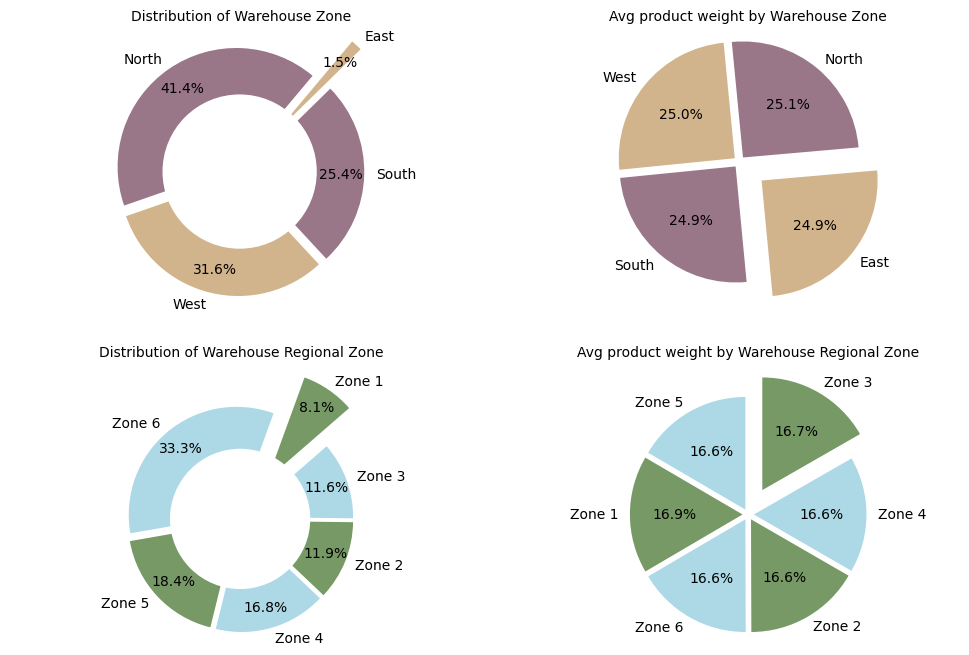

In [75]:
# zone

print("Unique values in zone" , df['zone'].unique())
print('  ')
print(df.groupby('zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

# regional zone

print("Unique values in regional zone" , df['WH_regional_zone'].unique())
print('  ')
print(df.groupby('WH_regional_zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 8))

# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

df['zone'].value_counts().plot(kind = 'pie', colors = ['#997688', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.45),
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse Zone', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))


x = df.groupby('zone')['product_wg_ton'].mean()
labels= df['zone'].unique()
plt.pie(x, colors =['#997688', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.25), startangle=5, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Zone', fontsize=10)

# Regional zone
# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))

df['WH_regional_zone'].value_counts().plot(kind = 'pie', colors = ['lightblue', '#769966'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.45),
                                     startangle=70, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse Regional Zone', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))


x = df.groupby('WH_regional_zone')['product_wg_ton'].mean()
labels= df['WH_regional_zone'].unique()
plt.pie(x, colors =['lightblue', '#769966'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.25), startangle=90, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Regional Zone', fontsize=10)

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">zone & Regional_zone</h1>

#### zone 
* The North Zone exhibits the highest production levels, whereas the East Zone demonstrates the lowest production levels.
* On the other hand, the subsequent chart illustrates minimal fluctuations in product weight across different zones.
* The total product weight tends to be greater for values that occur most frequently.


#### Regional_zone
* The Regional Zone 6 exhibits a significant number of warehouses.
* Meanwhile, the subsequent chart suggests that there is minimal fluctuation in product weight across different Regional Zone.
* The total product weight tends to be greater for values that occur most frequently.



Unique values in Government certification grades ['C' 'A+' 'B' 'B+' 'A' '0']
  
  approved_wh_govt_certificate  product_wg_ton
5                            C    1.302864e+09
1                            A    1.127473e+09
4                           B+    1.105302e+09
2                           A+    1.082703e+09
3                            B    1.075033e+09
0                            0    3.922000e+03
  


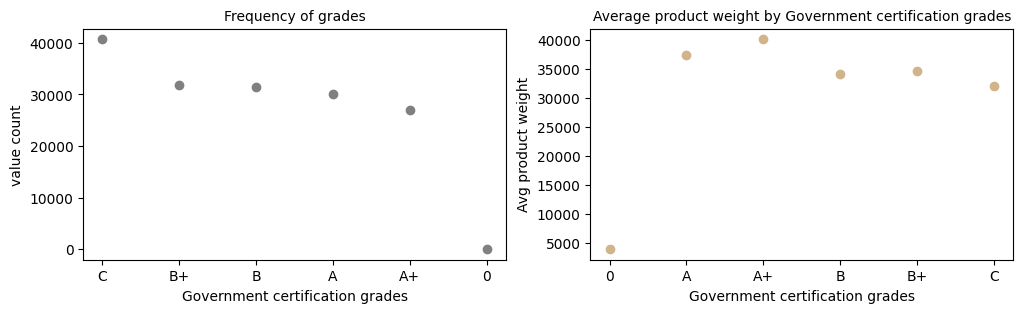

In [76]:
print("Unique values in Government certification grades", df['approved_wh_govt_certificate'].unique())
print('  ')
print(df.groupby('approved_wh_govt_certificate')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['approved_wh_govt_certificate'].value_counts()

plt.scatter(x.index, x.values, color='grey' , marker='o')
plt.xlabel('Government certification grades')
plt.title('Frequency of grades', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('approved_wh_govt_certificate')['product_wg_ton'].mean()

plt.scatter(x.index, x.values, color='tan', marker='o')
plt.title('Average product weight by Government certification grades', fontsize=10)
plt.xlabel('Government certification grades')
plt.ylabel('Avg product weight')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Type of approval by government</h1>

#### Type of approval by government

* The average product weight vs grades demonstrates a correlation between warehouses with the highest government approvals and the highest product weights.
* Although the C grade is the lowest designation, it corresponds to the highest total product weights, primarily because the majority of warehouses are categorized as C grade.




<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">govt checking in last 3 months</h1>

Unique values in govt checking in last 3 months [24.  3.  6.  2. 28.  1. 11. 27. 19.  8. 23. 12. 26. 14. 10. 13. 17. 30.
 32. 25. 31.  9. 29. 15. 16. 22.  5. 18. 20. 21.  4.  7. 34. 33. 35.  0.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 51. 50. 52. 53.
 55. 56. 54. 59. 57. 58. 62. 61. 60.]
  
    govt_check  product_wg_ton
32        32.0     196322493.0
30        30.0     196055765.0
31        31.0     195355171.0
26        26.0     194744872.0
29        29.0     192130766.0
  


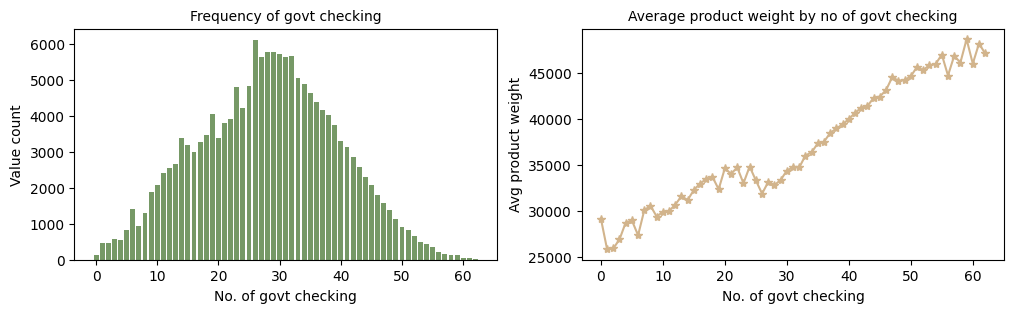

In [77]:
# govt_check_l3m
print("Unique values in govt checking in last 3 months" , df['govt_check'].unique())
print('  ')
print(df.groupby('govt_check')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['govt_check'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of govt checking')
plt.ylabel('Value count')
plt.title('Frequency of govt checking', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('govt_check')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='tan', marker='*')
plt.xlabel('No. of govt checking')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of govt checking', fontsize=10)

plt.show()

Unique values in govt checking in last 3 months [24.  3.  6.  2. 28.  1. 11. 27. 19.  8. 23. 12. 26. 14. 10. 13. 17. 30.
 32. 25. 31.  9. 29. 15. 16. 22.  5. 18. 20. 21.  4.  7. 34. 33. 35.  0.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 51. 50. 52. 53.
 55. 56. 54. 59. 57. 58. 62. 61. 60.]
  
    govt_check  product_wg_ton
32        32.0     196322493.0
30        30.0     196055765.0
31        31.0     195355171.0
26        26.0     194744872.0
29        29.0     192130766.0
  


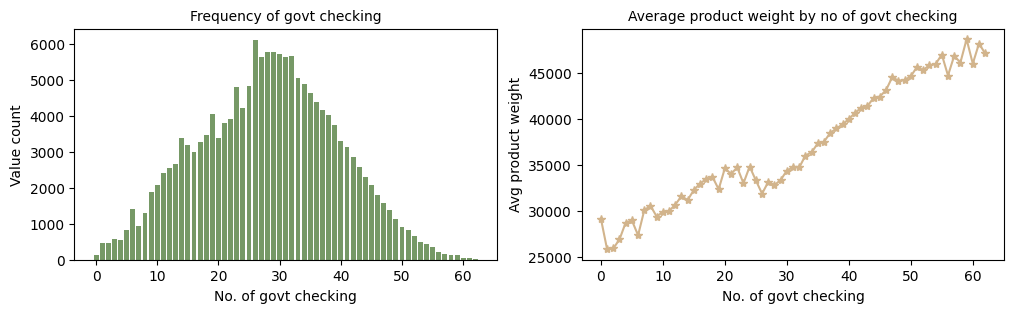

In [78]:
# govt_check_l3m
print("Unique values in govt checking in last 3 months" , df['govt_check'].unique())
print('  ')
print(df.groupby('govt_check')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['govt_check'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of govt checking')
plt.ylabel('Value count')
plt.title('Frequency of govt checking', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('govt_check')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='tan', marker='*')
plt.xlabel('No. of govt checking')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of govt checking', fontsize=10)

plt.show()

#### Govt checking in last 3 months
* No. of government checking in last 3 months ranges from 1 to 32 times. The bar graph demonstrates significant fluctuations in value counts.
* As the value count increases, total product weight increases. In case of average product weight, has no notable oscillations.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of workers</h1>

Unique values in No. of workers [25. 35. 27. 22. 37. 16. 28. 36. 41. 31. 24. 17. 19. 29. 46. 33. 43. 32.
 20. 38. 39. 26. 23. 34. 18. 40. 30. 47. 15. 45. 48. 42. 21. 62. 50. 44.
 49. 14. 55. 61. 54. 10. 57. 53. 56. 52. 11. 51. 13. 65. 60. 12. 58. 63.
 67. 64. 59. 66.  8.  9.]
  
    workers_num  product_wg_ton
29         37.0     206521134.0
30         38.0     205901914.0
28         36.0     204849385.0
31         39.0     204517393.0
32         40.0     199673212.0
  


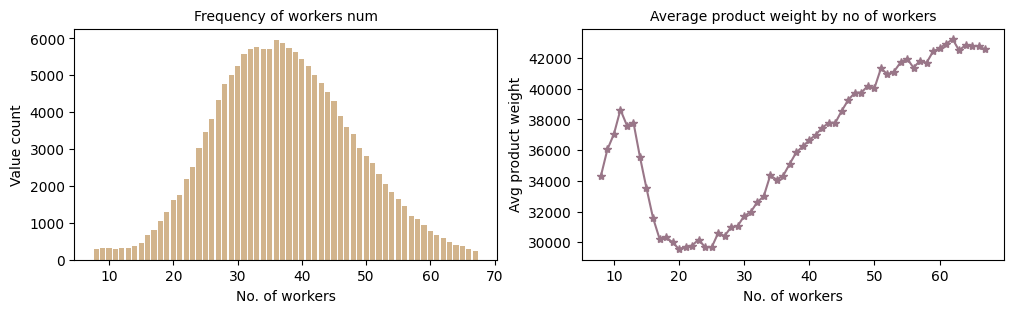

In [79]:
# workers_num
print("Unique values in No. of workers" , df['workers_num'].unique())
print('  ')
print(df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['workers_num'].value_counts()

plt.bar(x.index, x.values, color='tan')
plt.xlabel('No. of workers')
plt.ylabel('Value count')
plt.title('Frequency of workers num', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('workers_num')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='#997688', marker='*')
plt.xlabel('No. of workers')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of workers', fontsize=10)

plt.show()

#### No. of workers

*  The value count graph exhibits a distribution resembling a normal curve, with the exception of the central point, which registers higher than all others.
*  There are no significant variations in average product weight in relation to the number of workers. However, when the workforce is at its smallest, the average product weight tends to be lower.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Warehouse capacity size & Transport issue</h1>

Unique values in Warehouse capacity size ['Large' 'Small' 'Mid']
  
  WH_capacity_size  product_wg_ton
0            Large    2.322056e+09
1              Mid    2.291983e+09
2            Small    1.079340e+09
  
Unique values in Transport issue in 1 year [ 1  0  2  3  4  5  6  7  8 10  9]
  
    transport_issue  product_wg_ton
0                 0    1.754228e+09
2                 2    9.096735e+08
1                 1    8.524886e+08
3                 3    6.295357e+08
4                 4    5.089611e+08
5                 5    3.603264e+08
6                 6    2.565207e+08
7                 7    1.731017e+08
8                 8    1.224531e+08
9                 9    7.680946e+07
10               10    4.928022e+07
  


ValueError: 'explode' must be of length 'x'

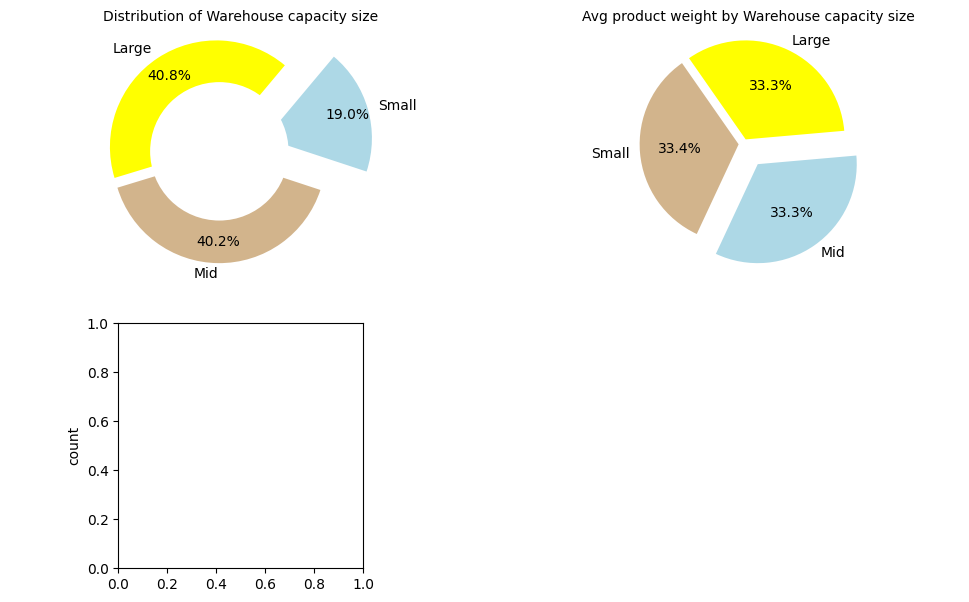

In [80]:
# Warehouse capacity size
print("Unique values in Warehouse capacity size", df['WH_capacity_size'].unique())
print('  ')
print(df.groupby('WH_capacity_size')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
# Transport issue in 1 year
print("Unique values in Transport issue in 1 year", df['transport_issue'].unique())
print('  ')
print(df.groupby('transport_issue')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 7))

# Warehouse capacity size
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

df['WH_capacity_size'].value_counts().plot(kind = 'pie', colors = ['yellow', 'tan', 'lightblue'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.45),
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse capacity size', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))


x = df.groupby('WH_capacity_size')['product_wg_ton'].mean()
labels= df['WH_capacity_size'].unique()
plt.pie(x, colors =['yellow', 'tan', 'lightblue'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.25), startangle=5, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse capacity size', fontsize=10)

# transport issue in 1 year
# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))

df['transport_issue'].value_counts().plot(kind = 'pie', colors = ['lightblue', '#769966', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.45),
                                     startangle=70, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Transport issue', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))


x = df.groupby('transport_issue')['product_wg_ton'].mean()
labels= df['transport_issue'].unique()
plt.pie(x, colors =['lightblue', '#769966', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.25), startangle=90, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Transport issue', fontsize=10)

plt.show()

#### Warehouse capacity size

* Different capacity sizes of warehouse are small, mid and large. From the frequency distribution plot, only a lesser number of warehouses are of small
  size. Rest of them are almost equally distributed among mid and large size. It reflects in the total product weight too.
*  No noticable variations can be identify when comparing average product weight of these sizes.

#### Transport issue in last 1 year

* Frequency distribution depicts majority of warehouses didnt face any transport issues in last one year.
* Small percentage of discrepency is seen according to average product weight, but no particular pattern.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Competitor_in_mkt</h1>

In [81]:
print("Unique values in No. of competitors in the market", df['Competitor_in_mkt'].unique())
print('  ')
print(df.groupby('Competitor_in_mkt')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['Competitor_in_mkt'].value_counts()

plt.bar(x.index, x.values, color='#997688', width=0.5)
plt.xlabel('No. of competitors in the market')
plt.title('Frequency of No. of competitors', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('Competitor_in_mkt')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='o')
plt.title('Average product weight by No. of competitors in the market', fontsize=10)
plt.xlabel('No. of competitors in the market')
plt.ylabel('Avg product weight')

plt.show()

KeyError: 'Competitor_in_mkt'

#### No. of competitors in market

* The value count plot shows high variation in distribution.
* Out of the 8 unique values, 3 has most number of values, which means majority of the warehouses have either 2,3, or 4 competitors in market and they makes the highest amount of product in total.
* Comparing Average product weight, warehouses with no competitors has the lowest value and rest of them has no big difference.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of Distributors</h1>

In [82]:
# distributor_num
print("Unique values in No. distributors", df['distributor_num'].unique())
print('  ')
print(df.groupby('distributor_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')


x = df['distributor_num'].value_counts().sort_index()

avg_product_weight = df.groupby('distributor_num')['product_wg_ton'].mean()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plotting the line plot for value count
ax1.bar(x.index, x.values, color='grey',  label='Value Count')
ax1.set_ylabel('Value Count', color='red')

# Creating a secondary y-axis and plotting the bar graph for average product weight
ax2 = ax1.twinx()
ax2.plot(avg_product_weight.index, avg_product_weight.values, color='yellow', marker='o', markeredgecolor = 'red', label='Average Product Weight')
ax2.set_ylabel('Average Product Weight', color='red')

# Adding legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)

# Setting labels and title
ax1.set_xlabel('Number of Distributors')
plt.title('Value Count and Average Product Weight')


plt.show()

KeyError: 'distributor_num'

#### No. of Distributors

* The values are distributed almost evenly, as evident from the frequency distribution.
* The line plot illustrates minimal variations in average product weight, ranging from 20,000 to 24,500, without displaying any pattern.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of refill request in last 3 months</h1>

In [83]:
print("Unique values in No. of refill request in last 3 months", df['num_refill_req_l3m'].unique())
print('  ')
print(df.groupby('num_refill_req_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

df['num_refill_req_l3m'].value_counts().plot(kind = 'pie', colors = ['lightblue', 'tan'], autopct='%1.0f', explode=[0.05, 0.02, 0.08, 0.05, 0.05, 0.4, 0.05, 0.05, 0.05],
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.25, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of refill request in percentage', fontsize=10)


# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('num_refill_req_l3m')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='d', markeredgecolor='lightslategrey')
plt.title('Average product weight by No. of refill request', fontsize=10)
plt.xlabel('No. of refill request')
plt.ylabel('Avg product weight')

plt.show()

KeyError: 'num_refill_req_l3m'

#### No. of refill request in last 3 months

* The distribution of no. of refill request in last 3 months is almost uniform with percentage 12 and 11 except for one value, which is 7%.
* Average product weight among them falls within the range of 22,000 to 24,000, indicating minimal variation. Also, total product weight positively correlated with value counts.


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Distance from hub</h1>

In [84]:
df_copy = df.copy()

In [85]:
print("Total no. of unique values in Distance from hub", len(df['dist_from_hub'].unique()))
print('  ')

# define bin edges : 
# Retail shop number : min value = 55, max value = 271

bins =[55, 80, 105, 130, 155, 180, 205, 230, 255]



# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['dist_from_hub'], bins)

bin_counts = df_copy['bins'].value_counts().sort_index()

# Create a DataFrame from bin_counts
table_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values})

# Display the table
print(table_df)

Total no. of unique values in Distance from hub 217
  
          Bin  Count
0    (55, 80]  18194
1   (80, 105]  18571
2  (105, 130]  18298
3  (130, 155]  18628
4  (155, 180]  18739
5  (180, 205]  18705
6  (205, 230]  18363
7  (230, 255]  18874


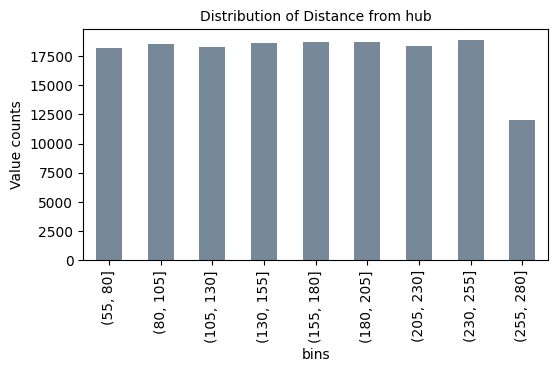

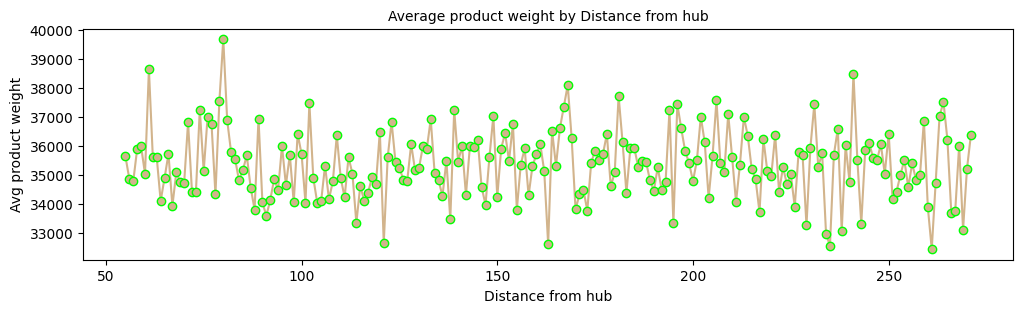

In [86]:
plt.figure(figsize=(6, 3))

# plot 1
#ax1 = plt.subplot2grid((1, 2), (0, 0)) 

bin =[55, 80, 105, 130, 155, 180, 205, 230, 255, 280]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['dist_from_hub'], bins=bin)

#plot bargraph
df_copy['bins'].value_counts().sort_index().plot(kind='bar', color='lightslategrey')

plt.title('Distribution of Distance from hub', fontsize=10)
plt.ylabel('Value counts')
plt.show()


avg_product_weight = df.groupby('dist_from_hub')['product_wg_ton'].mean()
plt.figure(figsize=(12, 3))
plt.plot(avg_product_weight.index, avg_product_weight.values, color='tan', marker='o', markeredgecolor = 'lime')
plt.title('Average product weight by Distance from hub', fontsize=10)
plt.xlabel('Distance from hub')
plt.ylabel('Avg product weight')

plt.show()

##### Distance from hub

* This column has many unique values, thus plotting graph in bins.
* The values are distributed almost evenly, except for last bin.
* The line plot shows variations in average product weight, ranging from 19,000 to 28,000, but no specific pattern is visible.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Retail shop number</h1>

In [87]:
print("Total no. of unique values in no. of retail shops", len(df['retail_shop_num'].unique()))
print('  ')

# define bin edges : 
# Retail shop number : min value = 1821, max value = 11008

bins =[1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

bin_counts = df_copy['bins'].value_counts().sort_index()

# Create a DataFrame from bin_counts
table_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values})

# Display the table
print(table_df)

KeyError: 'retail_shop_num'

In [88]:
print("Total no. of unique values in no. of retail shops", len(df['retail_shop_num'].unique()))
print('  ')

# define bin edges : 
# Retail shop number : min value = 1821, max value = 11008

bins =[1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

bin_counts = df_copy['bins'].value_counts().sort_index()

# Create a DataFrame from bin_counts
table_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values})

# Display the table
print(table_df)

KeyError: 'retail_shop_num'

KeyError: 'retail_shop_num'

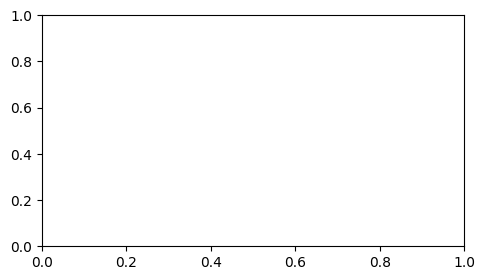

In [89]:
plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0)) 

# define bin edges
bins =[1500, 3000, 4500, 6000, 7500]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

#plot bargraph

df_copy['bins'].value_counts().sort_index().plot(kind='pie',  colors = ['cyan', 'tan', 'lightblue', 'yellow'], autopct='%1.1f%%', explode=(0.45, 0.05, 0.05, 0.2),
                                     startangle=180, ylabel='  ')
plt.axis('equal')
plt.title('Distribution of no. of retail shops', fontsize=10)


# plot 1

ax2 = plt.subplot2grid((1, 2), (0, 1)) 
sns.barplot(data=df_copy, x='bins', y='product_wg_ton', color='yellow')

plt.ylabel(' Avg product weight')
plt.xlabel('No. of retail shops')
plt.title('Average Product weight by No. of retail shops', fontsize=10)
plt.yticks(rotation=65)
plt.show()

#### No. of Retail shops

* This column has the highest number of unique values, thus plotting graph in bins.
* Analysing the table of bin versus value counts and pie chart, the bin ranges from 4500 to 6000 contains the highest number of values.
* Comparing the average product weight by the number of retail shops with a bar chart, no noticable difference is observed.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Transformation</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Encoding</h1>

In [90]:
# Numerical columns & categorical columns in train dataset

num_columns_train=[i for i in df.columns if df[i].dtypes != 'O']
cat_columns_train=[i for i in df.columns if df[i].dtypes == 'O']

# Numerical columns & categorical columns in test dataset

num_columns_test=[i for i in df_test.columns if df_test[i].dtypes != 'O']
cat_columns_test=[i for i in df_test.columns if df_test[i].dtypes == 'O']


In [91]:
# Label Encoding for categorical variables
 
for i in cat_columns_train:
    df[i] = LabelEncoder().fit_transform(df[i])

for i in cat_columns_test:
    df_test[i] = LabelEncoder().fit_transform(df_test[i])

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Scaling</h1>

In [92]:
# display number of unique values in each column
df.nunique().sort_values(ascending=False)

product_wg_ton                  54049
No_of_retailers                  6267
dist_from_hub                     217
Number_of_distributors            115
govt_check                         63
workers_num                        60
storage_issue_reported             57
wh_breakdown                       38
wh_est_year                        28
Refill_Requests                    15
transport_issue                    11
No_of_Competitor                   10
approved_wh_govt_certificate        6
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [93]:
columns_with_more_than_two_unique_values_train = df.columns[df.nunique()>2]

In [94]:
columns_with_more_than_two_unique_values_test = df_test.columns[df_test.nunique()>2]

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161071 entries, 4 to 350000
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Location_type                 161071 non-null  int64  
 1   WH_capacity_size              161071 non-null  int64  
 2   zone                          161071 non-null  int64  
 3   WH_regional_zone              161071 non-null  int64  
 4   Refill_Requests               161071 non-null  int64  
 5   transport_issue               161071 non-null  int64  
 6   No_of_Competitor              161071 non-null  int64  
 7   No_of_retailers               161071 non-null  int64  
 8   Warehouse_Ownership           161071 non-null  int64  
 9   Number_of_distributors        161071 non-null  int64  
 10  electric_supply               161071 non-null  int64  
 11  dist_from_hub                 161071 non-null  int64  
 12  workers_num                   161071 non-null  fl

In [96]:
# Standard Scaling for numerical variables

for i in columns_with_more_than_two_unique_values_train:
  df[i] = StandardScaler().fit_transform(df[[i]])

for i in columns_with_more_than_two_unique_values_test:
  df_test[i] = StandardScaler().fit_transform(df_test[[i]])

In [97]:
df.sample(5).T

,342268,311131,179736,33861,146853
Location_type,1.000000,0.000000,0.000000,0.000000,0.000000
WH_capacity_size,-1.053654,-1.053654,1.643372,-1.053654,-1.053654
zone,-0.989039,-0.989039,-0.989039,-0.989039,1.282470
WH_regional_zone,1.048913,1.048913,1.048913,1.048913,0.447853
Refill_Requests,-0.631186,-1.539752,-1.236897,-0.934041,-1.236897
transport_issue,-0.507450,0.777666,2.491153,-0.935822,1.206038
No_of_Competitor,-1.362400,0.675845,-0.954751,-0.954751,0.268196
No_of_retailers,0.078354,-0.234597,0.186448,0.148964,0.700768
Warehouse_Ownership,0.000000,0.000000,0.000000,1.000000,1.000000
Number_of_distributors,1.028397,1.495577,0.280909,-0.746886,-0.513296


In [98]:
df_test.sample(5).T

,88211,143604,89137,155243,23062
Date,-0.798327,-0.295918,-0.798327,-0.044713,-1.551941
Location_type,0.000000,0.000000,1.000000,0.000000,0.000000
WH_capacity_size,-1.054968,0.291459,0.291459,0.291459,-1.054968
zone,1.287236,0.149716,1.287236,1.287236,-0.987805
WH_regional_zone,1.049290,-0.151152,-0.151152,-0.151152,1.049290
Refill_Requests,-0.163289,0.422932,2.474707,1.009154,0.716043
transport_issue,0.312009,0.312009,-0.968211,0.312009,-0.541471
No_of_Competitor,-0.135581,-0.544432,1.090973,-1.362134,0.273270
No_of_retailers,-0.124475,-0.290916,0.015823,1.112936,-0.104433
Warehouse_Ownership,1.000000,1.000000,1.000000,1.000000,0.000000


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Feature Selection</h1>

In [99]:
# correlation heatmap

In [100]:
plt.figure(figsize=(10,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=1, cbar=False)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x1000 with 0 Axes>

In [101]:
data = df.loc[:, df.columns !='product_wg_ton']
correlations = data.corrwith(df['product_wg_ton']).round(3).sort_values(ascending=True)
correlations

wh_est_year                    -0.345
approved_wh_govt_certificate   -0.163
Refill_Requests                -0.035
zone                           -0.007
No_of_retailers                -0.002
dist_from_hub                  -0.002
WH_regional_zone                0.000
WH_capacity_size                0.001
Warehouse_Ownership             0.007
electric_supply                 0.008
No_of_Competitor                0.028
Location_type                   0.048
temp_reg_mach                   0.057
transport_issue                 0.162
workers_num                     0.249
govt_check                      0.265
Number_of_distributors          0.285
wh_breakdown                    0.465
storage_issue_reported          0.717
dtype: float64

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Splitting Dataset</h1>

In [102]:
#Selecting Independent (Features) & Dependent(Target) variables

X_train = df.drop(['product_wg_ton', 'WH_regional_zone'], axis=1)
Y_train = df['product_wg_ton']



In [103]:
X_test = df_test.drop(['product_wg_ton','WH_regional_zone','Date'], axis=1)
Y_test = df_test['product_wg_ton']

In [104]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (161071, 18)
Shape of X_test: (308322, 17)


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Modelling</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Regression Models</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Linear Regression</h1>

In [105]:
# Initialize the model

LRmodel = LinearRegression()

In [106]:
# Fit model to the training data

LRmodel.fit(X_train, Y_train)

LinearRegression()

In [107]:
# Make predictions on the test data

LR_predicted = LRmodel.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- wh_est_year


In [ ]:
# Evaluate  the model

# r2 score
lr_r2 = r2_score(Y_test, LR_predicted).round(3)
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(Y_test, LR_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(Y_test, LR_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Decision Tree</h1>

In [ ]:
# Initialize the model

DTmodel = DecisionTreeRegressor(random_state = 0) 

In [ ]:
# Fit model to the training data

DTmodel.fit(X_train, Y_train) 

In [ ]:
# Make predictions on the test data

DT_predicted = DTmodel.predict(X_test)

In [ ]:
# Evaluate  the model

# r2 score
dt_r2 = r2_score(Y_test, DT_predicted).round(3)
print('R2 score:  ', dt_r2)

# root mean squared error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(Y_test, DT_predicted)).round(3)
print('Root Mean Squared Error:  ', dt_rmse) 

# mean absolute error (MAE)
dt_mae = mean_absolute_error(Y_test, DT_predicted).round(3)
print('Mean Absolute Error:  ', dt_mae)


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Random Forest</h1>

In [ ]:
# Initialize the model

RFmodel = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0) 

In [ ]:
# Fit model to the training data

RFmodel.fit(X_train, Y_train)

In [ ]:
# Make predictions on the test data

RF_predicted = RFmodel.predict(X_test)

In [ ]:
# Evaluate  the model

# r2 score
rf_r2 = r2_score(Y_test, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(Y_test, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(Y_test, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Support Vector Machine</h1>

In [ ]:
# Initialize the model

SVmodel = SVR() 

In [ ]:
# Fit model to the training data

SVmodel.fit(X_train, Y_train) 

In [ ]:
# Make predictions on the test data

SV_predicted = SVmodel.predict(X_test) 

In [ ]:
# Evaluate  the model

# r2 score
sv_r2 = r2_score(Y_test, SV_predicted).round(3)
print('R2 score:  ', sv_r2)

# root mean squared error (RMSE)
sv_rmse = np.sqrt(mean_squared_error(Y_test, SV_predicted)).round(3)
print('Root Mean Squared Error:  ', sv_rmse) 

# mean absolute error (MAE)
sv_mae = mean_absolute_error(Y_test, SV_predicted).round(3)
print('Mean Absolute Error:  ', sv_mae)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Gradient Boosting</h1>

In [ ]:
# Initialize the model

GBmodel = GradientBoostingRegressor()

In [ ]:
# Fit model to the training data

GBmodel.fit(X_train,Y_train)

In [ ]:
# Make predictions on the test data

GB_predicted = GBmodel.predict(X_test)

In [ ]:
# Evaluate  the model

# r2 score
gb_r2 = r2_score(Y_test, GB_predicted).round(3)
print('R2 score:  ', gb_r2)

# root mean squared error (RMSE)
gb_rmse = np.sqrt(mean_squared_error(Y_test, GB_predicted)).round(3)
print('Root Mean Squared Error:  ', gb_rmse) 

# mean absolute error (MAE)
gb_mae = mean_absolute_error(Y_test, GB_predicted).round(3)
print('Mean Absolute Error:  ', gb_mae)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px"> Actual vs Predicted Values</h1>

In [ ]:
plt.figure(figsize=(12, 12))


# linear regression

ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.scatter(Y_test, LR_predicted, color='#ffdab9', alpha=0.3, label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# decision tree

ax1 = plt.subplot2grid((2, 3), (0, 1))
plt.scatter(Y_test, DT_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# random forest

ax1 = plt.subplot2grid((2, 3), (0, 2))
plt.scatter(Y_test, RF_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# svm

ax1 = plt.subplot2grid((2, 3), (1, 0))
plt.scatter(Y_test, SV_predicted, color='#ffdab9', alpha=0.3, label='Actual')  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('SVM')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# gb

ax1 = plt.subplot2grid((2, 3), (1, 1))
plt.scatter(Y_test, GB_predicted, color='#ffdab9', alpha=0.3)  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--',color='#2f4f4f')
plt.title('Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px"> Metrics Table Evaluation</h1>

In [ ]:
Metrics = pd.DataFrame({'Model':('Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'),
                       'R2 Score': (lr_r2, dt_r2, rf_r2, sv_r2, gb_r2),
                       'Root Mean Squared Error': (lr_rmse, dt_rmse, rf_rmse, sv_rmse, gb_rmse),
                       'Mean Absolute Error': (lr_mae, dt_mae, rf_mae, sv_mae, gb_mae),
                      })
Metrics

In [ ]:
register_model(model, 
               score, 
               name="CPG_Inventory_Model", 
               description="Warehouse Certificate Allocation",
               flavour=MLModelFlavours.tensorflow,
               model_type="regression",
               y_true=y_test,
               features=testing_data.columns,
               input_type="json", 
               explain_ai=True,
               x_train=training_data, 
               x_test=testing_data, 
               y_train=y_train.tolist(),
               y_test=y_test.tolist(),
               y_pred=yProbs,
               feature_names=testing_data.columns.tolist(),
               original_features=testing_data.columns.tolist(),
               feature_ids=testing_data.columns,
               kyd=True,
               kyd_score = True)